# Final Project 

### Group Member
1. Dinesh Maria Antony
2. Inchara Niyanta
3. Kanika Nama

###  Emblem detection for Commerce using Re-inforced Learning


1. Finding a good learning rate
2. Data preprocessing
3. Augmentation
4. Baseline model.

## Algorithm Using or Method used:

## Convoluted Neural Network
   
   Our project recognizes the brand emblem present in any image.
The image emblem classification is built using two different models of neural network.
The main concept of image classification using CNN consisting three layers.
One model consists of Keras with tensorflow backend and the other is implementing using Google’s Inception v3 model.
At last ,our project is deployed in EC2 instance to create web application with user interface.


### Importing Python Libraries

In [23]:
import os,sys
import h5py
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import math
import glob
%matplotlib inline
from PIL import Image
import tensorflow as tf
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from keras.callbacks import ModelCheckpoint
from numpy import array
from scipy import misc
from tensorflow.python.client import device_lib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display
from IPython.display import Image as _Imgdis

In [24]:
!pip install tensorflow

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [25]:
!pip install keras

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Showing the Anotated Data set and the Images in them

Image examples: 
133298345.jpg


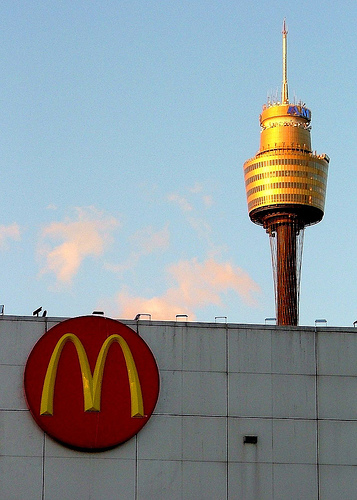

13455389.jpg


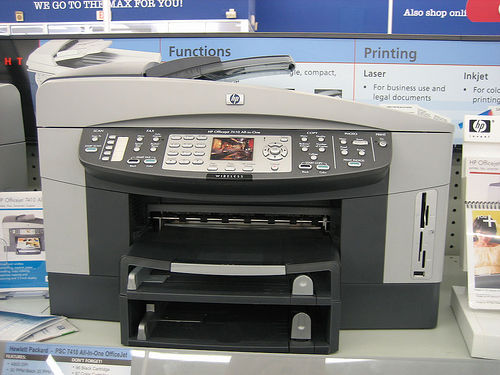

1352999361.jpg


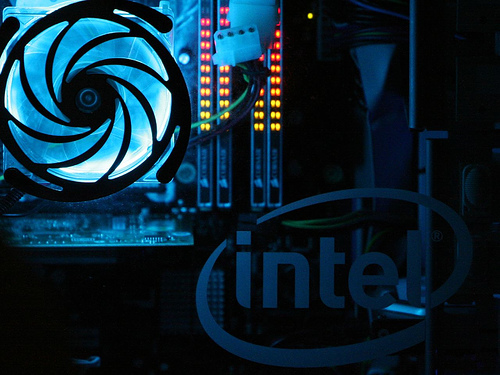

1354674694.jpg


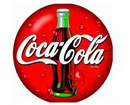

1358914296.jpg


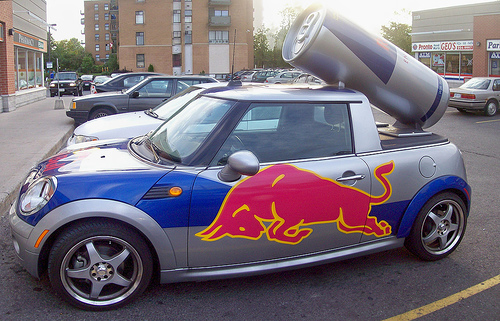

1358914336.jpg


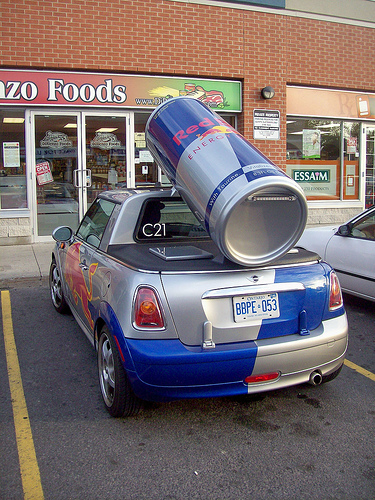

1359885883.jpg


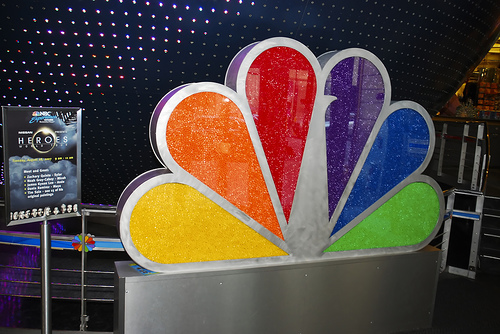

1381841108.jpg


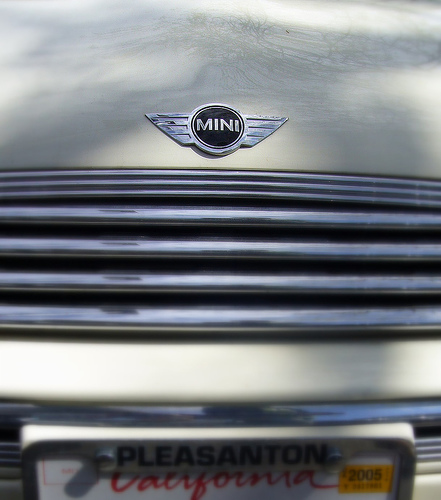

1391981336.jpg


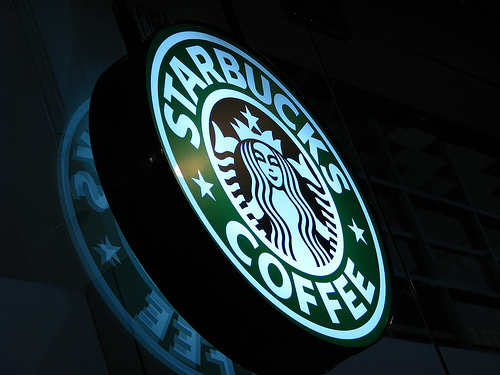

1402065041.jpg


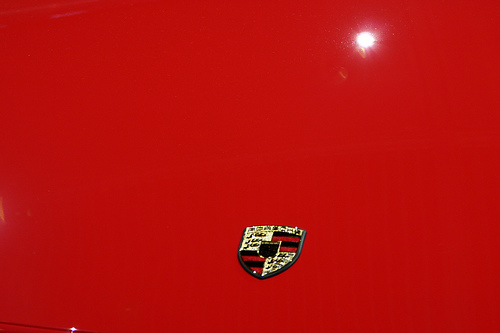

1408921955.jpg


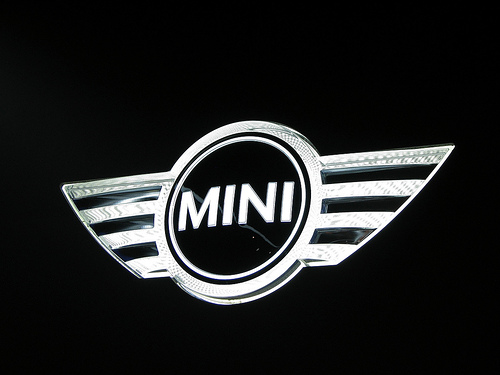

1412494805.jpg


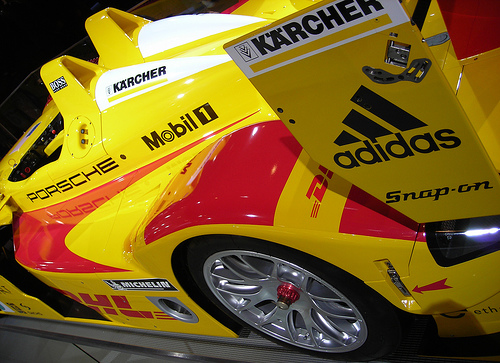

142479250.jpg


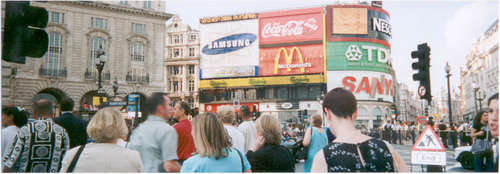

144488978.jpg


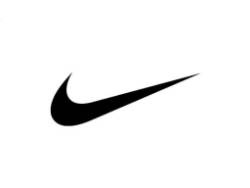

144503924.jpg


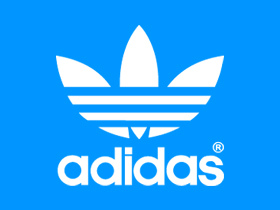

145074777.jpg


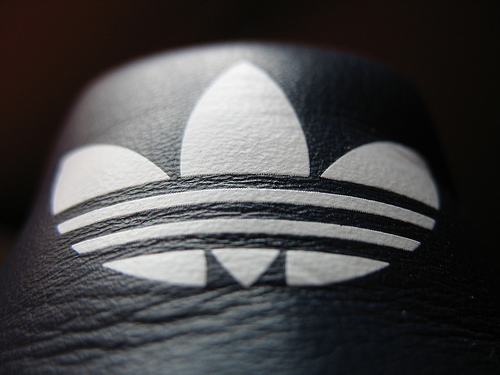

145116964.jpg


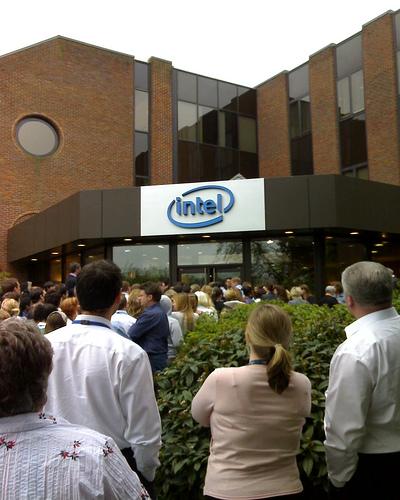

1484583303.jpg


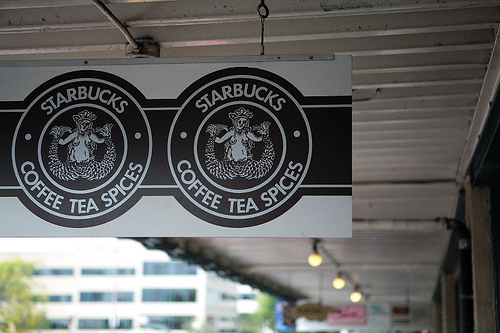

1485104539.jpg


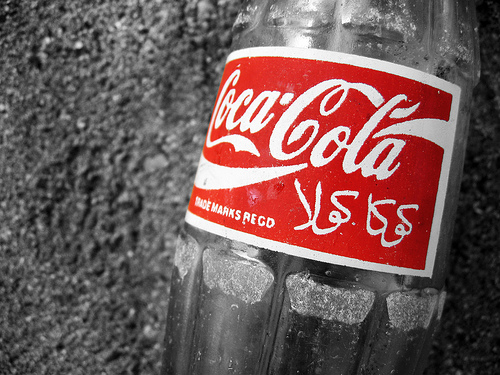

1492071424.jpg


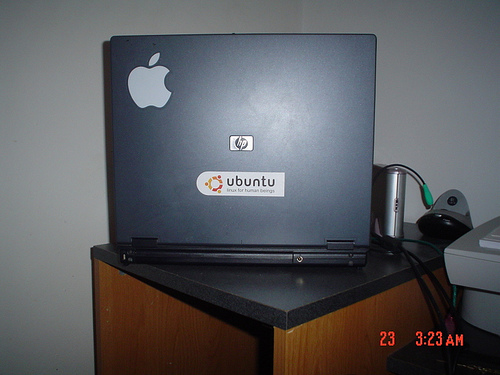

1508285598.jpg


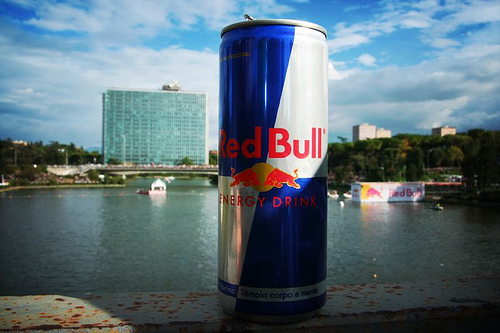

153237185.jpg


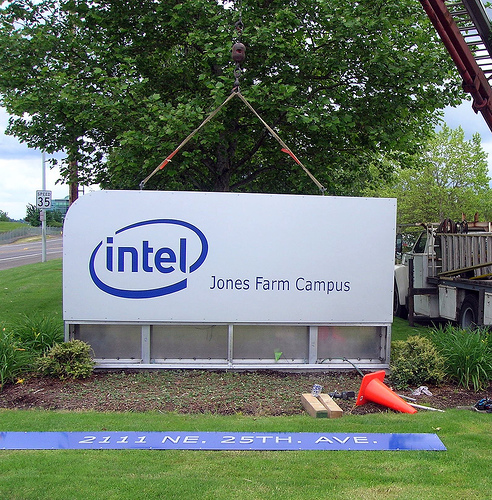

In [26]:
folder ="images"
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Image examples: ")
for i in range(20, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

## Classifying the Data and Seggregating them into their classes

In [27]:
annot_train = np.loadtxt('training_annotation.txt', dtype='a')
annot_test = np.loadtxt('validating_annotation.txt', dtype='a')
annot_train = annot_train.astype(str)
annot_test = annot_test.astype(str)

In [28]:
brands = []
for names in annot_train[:,1]:
    if names not in brands:
        brands.append(names)

In [29]:
for name in brands:
    if not os.path.exists(os.getcwd()+'/train/'+name):
        os.makedirs('train/'+name)
    if not os.path.exists(os.getcwd()+'/validate/'+name):
        os.makedirs('validate/'+name)

In [30]:
for name in brands:
    if not os.path.exists(os.getcwd()+'/train_gen/'+name):
        os.makedirs('train_gen/'+name)
    if not os.path.exists(os.getcwd()+'/validate_gen/'+name):
        os.makedirs('validate_gen/'+name)

In [31]:
images=glob.glob('images/*')
trainImageNameList = annot_train[:,0]
testImageNameList = annot_test[:,0]
cwd = os.getcwd()
for image in images:
    imageName = image.split(sep='\\')[1]
    if imageName in trainImageNameList:
        count = 0
        for names in trainImageNameList:
            if imageName in names:
                a = annot_train[count,1]
                im = Image.open(image)
                im.load()
                im.save(os.path.join(cwd, 'train', a)+'\\'+imageName)
                break
            count = count + 1
    else:
        count = 0
        for names in testImageNameList:
            if imageName in names:
                a = annot_test[count,1]
                if a not in 'none':
                    im = Image.open(image)
                    im.load()
                    im.save(os.path.join(cwd, 'validate',a)+'\\'+imageName)
                    break
            count = count + 1

### Generating the Data with the Present Dataset, Rotating them and Producing More images

In [32]:
datagen = ImageDataGenerator(
    rotation_range=20, # Degree range for random rotations
    width_shift_range=0.2, # Range for random horizontal shifts
    height_shift_range=0.2, # Range for random vertical shifts
    shear_range=0.2, # hear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.2, # Range for random zoom. If a float
    channel_shift_range=0.2, # Range for random channel shifts
    fill_mode='nearest', # Points outside the boundaries of the input are filled according to the given mode
    horizontal_flip=True, # Randomly flip inputs horizontally
    vertical_flip=True, # Randomly flip inputs vertically
    rescale=1./255, 
  )
for imgf in glob.iglob('train/yahoo/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/yahoo/', save_prefix='yahoo', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/Vodafone/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/Vodafone/', save_prefix='Vodafone', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/unicef/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/unicef/', save_prefix='unicef', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/Texaco/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/Texaco/', save_prefix='Texaco', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/starbucks/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/starbucks/', save_prefix='starbucks', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/sprite/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/sprite/', save_prefix='sprite', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/redbull/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/redbull/', save_prefix='redbull', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/puma/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/puma/', save_prefix='puma', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/porsche/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/porsche/', save_prefix='porsche', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/pepsi/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/pepsi/', save_prefix='pepsi', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/Nike/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/Nike/', save_prefix='nike', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/nbc/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/nbc/', save_prefix='nbc', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/mini/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/mini/', save_prefix='mini', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/mcdonalds/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/mcdonalds/', save_prefix='mcdonalds', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/intel/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/intel/', save_prefix='intel', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/hp/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/hp/', save_prefix='hp', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/heineken/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/heineken/', save_prefix='heineken', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/google/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/google/', save_prefix='google', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/ford/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/ford/', save_prefix='ford', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/ferrari/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1, 
                          save_to_dir='train_gen/ferrari/', save_prefix='ferrari', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/fedex/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/fedex/', save_prefix='fedex', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/dhl/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/dhl/', save_prefix='dhl', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/cocacola/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/cocacola/', save_prefix='cocacola', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/citroen/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/citroen/', save_prefix='citroen', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/bmw/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/bmw/', save_prefix='yahoo', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/apple/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/apple/', save_prefix='apple', save_format='jpg'):
        i += 1
        if i > 20:
            break

for imgf in glob.iglob('train/adidas/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train_gen/adidas/', save_prefix='adidas', save_format='jpg'):
        i += 1
        if i > 20:
            break

In [33]:
train_generator=datagen.flow_from_directory('train_gen', target_size=(64,64))

Found 16435 images belonging to 27 classes.


In [34]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
for imgf in glob.iglob('validate/yahoo/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/yahoo/', save_prefix='yahoo', save_format='jpg'):
        i += 1
        if i > 5:
            break
            
for imgf in glob.iglob('validate/Vodafone/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/Vodafone/', save_prefix='Vodafone', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/unicef/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/unicef/', save_prefix='unicef', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/Texaco/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/Texaco/', save_prefix='Texaco', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/starbucks/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/starbucks/', save_prefix='starbucks', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/sprite/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/sprite/', save_prefix='sprite', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/redbull/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/redbull/', save_prefix='redbull', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/puma/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/puma/', save_prefix='puma', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/porsche/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/porsche/', save_prefix='porsche', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/pepsi/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/pepsi/', save_prefix='pepsi', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/Nike/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/Nike/', save_prefix='nike', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/nbc/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/nbc/', save_prefix='nbc', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/mini/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/mini/', save_prefix='mini', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/mcdonalds/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/mcdonalds/', save_prefix='mcdonalds', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/intel/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/intel/', save_prefix='intel', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/hp/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/hp/', save_prefix='hp', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/heineken/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/heineken/', save_prefix='heineken', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/google/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/google/', save_prefix='google', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/ford/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/ford/', save_prefix='ford', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/ferrari/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/ferrari/', save_prefix='ferrari', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/fedex/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/fedex/', save_prefix='fedex', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/dhl/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/dhl/', save_prefix='dhl', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/cocacola/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/cocacola/', save_prefix='cocacola', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/citroen/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/citroen/', save_prefix='citroen', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/bmw/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/bmw/', save_prefix='yahoo', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/apple/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/apple/', save_prefix='apple', save_format='jpg'):
        i += 1
        if i > 5:
            break

for imgf in glob.iglob('validate/adidas/*.jpg'):
    img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0
    for batch in test_datagen.flow(x, batch_size=1,
                          save_to_dir='validate_gen/adidas/', save_prefix='adidas', save_format='jpg'):
        i += 1
        if i > 5:
            break

In [36]:

validation_generator = test_datagen.flow_from_directory('validate_gen', target_size=(64,64))

Found 808 images belonging to 27 classes.


###  Convoluted Neural Network or the Model to be traained 

In [37]:
def createModel():
    model = Sequential()
    model.add(Conv2D(64, 3, padding='same', activation='relu', input_shape=(64, 64, 3)))
    model.add(Conv2D(64, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3),strides=2 ))
    model.add(BatchNormalization())
#     model.add(Dropout(0.25))

    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(Conv2D(128, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
    model.add(BatchNormalization())
#     model.add(Dropout(0.25))

    model.add(Conv2D(256, 3, padding='same', activation='relu'))
    model.add(Conv2D(256, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
    model.add(BatchNormalization())
#     model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(27, activation='softmax'))
    return model

### Defining the Number of times the model as to be trained.


In [38]:
def poly_decay(epoch):
    # initialize the maximum number of epochs, base learning rate,
    # and power of the polynomial
    maxEpochs = 30
    baseLR = 5e-3
    power = 1.0

    # compute the new learning rate based on polynomial decay
    alpha = baseLR * (1 - (epoch / float(maxEpochs))) ** power

    # return the new learning rate
    return alpha


## Getting GPU's or Training the model with available system

In [40]:
def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']
if array(get_available_gpus()).size >= 1:
    with tf.device("/gpu:0"):
        model = createModel()
else:
    model = createModel()
opt = SGD(momentum=0.9, lr=5e-3)
model.compile(metrics=['accuracy'], optimizer=opt, loss='categorical_crossentropy')
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [LearningRateScheduler(poly_decay), checkpoint]
hist = model.fit_generator(train_generator, steps_per_epoch=500, epochs=30, workers=3, callbacks=callbacks_list, validation_data = validation_generator)

Epoch 1/30
500/500 [==============================] - 1132s 2s/step - loss: 3.6530 - acc: 0.1260 - val_loss: 3.1771 - val_acc: 0.1559

Epoch 00001: val_acc improved from -inf to 0.15594, saving model to weights.best.hdf5
Epoch 2/30
500/500 [==============================] - 1136s 2s/step - loss: 2.6824 - acc: 0.2271 - val_loss: 3.7736 - val_acc: 0.0817

Epoch 00002: val_acc did not improve from 0.15594
Epoch 3/30
500/500 [==============================] - 1157s 2s/step - loss: 2.3713 - acc: 0.3078 - val_loss: 2.9680 - val_acc: 0.2364

Epoch 00003: val_acc improved from 0.15594 to 0.23639, saving model to weights.best.hdf5
Epoch 4/30
500/500 [==============================] - 1178s 2s/step - loss: 2.1008 - acc: 0.3821 - val_loss: 3.5581 - val_acc: 0.2958

Epoch 00004: val_acc improved from 0.23639 to 0.29579, saving model to weights.best.hdf5
Epoch 5/30
500/500 [==============================] - 1160s 2s/step - loss: 1.8886 - acc: 0.4376 - val_loss: 4.6153 - val_acc: 0.2141

Epoch 00005

### Summary of the Result 

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 62, 62, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 30, 30, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 128)       0         
__________

## Plot to show Training Loss and accuracy

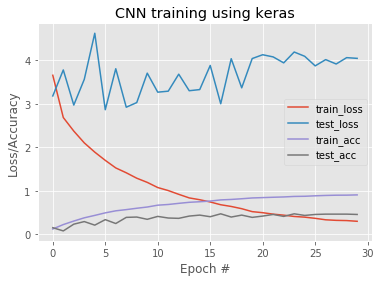

In [42]:
# grab the history object dictionary
H = hist.history

# plot the training loss and accuracy
N = np.arange(0, len(H["loss"]))
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H["loss"], label="train_loss")
plt.plot(N, H["val_loss"], label="test_loss")
plt.plot(N, H["acc"], label="train_acc")
plt.plot(N, H["val_acc"], label="test_acc")
plt.title("CNN training using keras")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# save the figure
plt.savefig("output-keras.jpg", format='JPEG')


plt.show()

## Testing

#### Input

In [112]:
img = misc.imread(os.getcwd()+'/test/3.jpg')

C:\Users\Vignesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [95]:
img =load_img(imgf, target_size=(64, 64))  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)


####  Predicted Output

In [111]:
# img = np.array(img)
# img = np.resize(img, (64,64,3))
# nimg = np.reshape(img,[1,64,64,3])
model.predict_classes(x)

array([15], dtype=int64)

#### Refernce to compare What the array has In it according to the classes.

In [76]:
brands = pd.DataFrame(data=np.zeros(27), columns=['Classes'])
count = 0
for brnd in os.listdir('train_gen'):
    brands.iloc[count] = brnd
    count=count+1
brands

,Classes
0,Adidas
1,Apple
2,BMW
3,Citroen
4,Cocacola
5,DHL
6,Fedex
7,Ferrari
8,Ford
9,Google


## What's Done:

We have trained the Model, IT is Predicting
But we still have to retrain the model with even more data.
Still needs lot of data to be fed and increase the accuracy and prediction details.


### What More to do:
    We have to do Docker and Pipeline, Host it on a Platform for Easy usage.

#### References:

[1] https://en.wikipedia.org/wiki/Convolutional_neural_network.

[2] Khosla, Aditya, et al. "Novel dataset for finegrained image categorization: Stanford dogs." Proc.
CVPR Workshop on Fine-Grained Visual.
Categorization (FGVC). Vol. 2. 2011.

[3] Liu, Jiongxin, et al. "Dog breed classification using part localization." Computer Vision–ECCV 2012 (2012): 172-185.

[4] Aditya Khosla, Nityananda Jayadevaprakash,Bangpeng Yao and Li Fei-Fei. First Workshop on FineGrained Visual Categorization (FGVC), IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2011.

[5] Moghaddam, Baback, Tony Jebara, and Alex Pentland. "Bayesian face recognition." Pattern Recognition 33.11 (2000): 1771-1782.

[6] Viola, Paul, and Michael J. Jones. "Robust real-time face detection." International journal of computer vision 57.2 (2004):37-154.

[7] Angelova, Anelia, and Shenghuo Zhu. "Efficient object detection and segmentation for fine-grained recognition." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2013.

[8] Foody, Giles M., and Ajay Mathur. "A relative evaluation of multiclass image classification by support vector machines." IEEE Transactions on geoscience and remote sensing 42.6 (2004): 1335-1343.

[9] Haralick, Robert M., and Karthikeyan Shanmugam. "Textural features for image classification." IEEE Transactions on systems, man, and cybernetics 6 (1973): 610-621.

[10] Lu, Dengsheng, and Qihao Weng. "A survey of image classification methods and techniques for improving classification performance." International journal of Remote sensing 28.5 (2007): 823-870.

[11] https://shuaiw.github.io/2017/01/24/deep-learning-for-logo-recognition-part-i.html

[12] https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8